In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers, datasets, activations, optimizers, losses, metrics
import matplotlib.pyplot as plt

In [2]:
#  LOAD AND SPLIT DATASET
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print("train_images shape:", train_images.shape, "train_labels shape:", train_labels.shape)

train_images shape: (60000, 28, 28) train_labels shape: (60000,)


Pullover


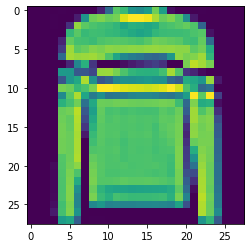

In [3]:
label = 5
plt.imshow(train_images[label])
print(class_names[train_labels[label]])

In [4]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(units=128, activation=activations.relu))
model.add(layers.Dense(units=10, activation=activations.softmax))

model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [5]:
with tf.device('/device:GPU:0'):
    model.fit(train_images, train_labels, epochs=10, use_multiprocessing=True)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 99us/sample - loss: 0.4941 - accuracy: 0.8261
Epoch 2/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.3789 - accuracy: 0.8630
Epoch 3/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.3408 - accuracy: 0.8757
Epoch 4/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.3141 - accuracy: 0.8851
Epoch 5/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.2950 - accuracy: 0.8918
Epoch 6/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.2800 - accuracy: 0.8964
Epoch 7/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2690 - accuracy: 0.9005
Epoch 8/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.2579 - accuracy: 0.9043
Epoch 9/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.2480 - accuracy: 0.9079
Epoch 10/10
60

In [6]:
loss, acc = model.evaluate(test_images, test_labels)
print("model's accuracy is: ", acc)

10000/10000 [==============================] - 1s 72us/sample - loss: 0.3353 - accuracy: 0.8805
model's accuracy is:  0.8805
